In [13]:
from sklearn import datasets
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import copy
import sys

In [8]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import euclidean_distances #We can calculate this matrix using 2 for loops, 
#but this isn't that important to calculate so we directly use this
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

In [43]:
def test(data,linkage,no_of_clusters):  
    
    initial_distances = cdist(data, data)
    np.fill_diagonal(initial_distances,sys.maxsize)
    
    clusters = find_clusters(initial_distances,linkage) 
    
    #plotting the clusters
    iteration_number = initial_distances.shape[0] - no_of_clusters
    clusters_to_plot = clusters[len(data)-no_of_clusters]
    arr, counts = np.unique(clusters_to_plot, return_counts=True)
    
    print(clusters_to_plot)
    #print(arr)
    print(counts)
    
    

In [44]:
def find_clusters(input,linkage):
    clusters = {}
    row_index = -1
    col_index = -1
    array = []
    

    for n in range(input.shape[0]):
        array.append(n)
        
    clusters[0] = array.copy()
    
    

    #finding minimum value from the distance matrix
    #note that this loop will always return minimum value from bottom triangle of matrix
    for k in range(1, input.shape[0]):
        #min_val = sys.maxsize
        
#         for i in range(0, input.shape[0]):
#             for j in range(0, input.shape[1]):
#                 if(input[i][j]<=min_val):
#                     min_val = input[i][j]
#                     row_index = i
#                     col_index = j
                    
        
        a = divmod(input.argmin(), input.shape[1])
        #print(a[1],a[0])
        row_index=a[1]
        col_index=a[0]
        #print("row, col = ", row_index, col_index)
        #once we find the minimum value, we need to update the distance matrix
        #updating the matrix by calculating the new distances from the cluster to all points
        
        #for Single Linkage
        if linkage == "single":
            for i in range(0,input.shape[0]):
                if(i != col_index):
                    #we calculate the distance of every data point from newly formed cluster and update the matrix.
                    temp = min(input[col_index][i],input[row_index][i])
                    #we update the matrix symmetrically as our distance matrix should always be symmetric
                    input[col_index][i] = temp
                    input[i][col_index] = temp
                    
                    
                    
        for i in range (0,input.shape[0]):
            input[row_index][i] = sys.maxsize
            input[i][row_index] = sys.maxsize

                #Manipulating the dictionary to keep track of cluster formation in each step
                #if k=0,then all datapoints are clusters

        minimum = min(row_index,col_index)
        maximum = max(row_index,col_index)
        for n in range(len(array)):
            if(array[n]==maximum):
                array[n] = minimum
        clusters[k] = array.copy()

    return clusters

In [45]:
from scipy.io import arff

abalone = arff.loadarff("abalone.arff")
abalone_df = pd.DataFrame(abalone[0])
abalone_df = (abalone_df - abalone_df.min()) / (abalone_df.max() - abalone_df.min())
abalone_np = np.array(abalone_df)

In [46]:
test(abalone_np,"single",5)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 33, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 163, 0, 165, 163, 167, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[195   1   2   1   1]


In [66]:
bo, co = np.unique(b, return_counts=True)

In [80]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from sklearn import datasets
from numpy import linalg as LA
from sklearn.metrics.pairwise import pairwise_distances
import sys

[0, 1, 0, 1, 1]


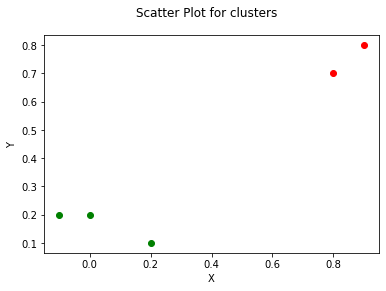

In [81]:
x = np.array([[0.8,0.7],[-0.1,0.2],[0.9,0.8],[0.0,0.2],[0.2,0.1]])
test(x,"single",2)

In [68]:
from sklearn.cluster import AgglomerativeClustering

In [71]:
cluster = AgglomerativeClustering(n_clusters=5, linkage="single").fit(abalone_np)

In [72]:
print(cluster.labels_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 3 2 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [18]:
b[0]

194.0

In [22]:
boo, count = np.unique(b, return_counts=True)

In [23]:
boo

array([178., 188., 190., 194.,  inf])

In [24]:
count

array([ 43,   9,   2, 145,   1], dtype=int64)

In [3]:
x

NameError: name 'x' is not defined